## 1er Parcial - Simulación Computacional 2017-II


In [1]:
import numpy as np
import scipy as sp

def genran(a,b,m,xant):
    xsig = (a*xant + b) % m
    usig = xsig / m
    return [xsig,usig]

def genranN(a,b,m,x0,N):
    xant = x0
    I=[]
    X=[]
    U=[]
    for t in range(1, N+1):
        [xi,ui] = genran(a,b,m,xant)
        I.append(t)
        X.append(xi)
        U.append(ui)
        xant = xi
    return [I,X,U]

def showValues(I,X,U):
    print("i\tXi\tUi")
    for t in range(0, len(X)):
        print("%d\t%d\t%2.4f" % (I[t],X[t],U[t]), sep=' ', end='\n')

_(1 punto)_
**1) Sea $X_n = ( aX_{n-1} + b ) \mod m$ un generador congruencial con los siguientes parámetros: $m=321$, $a=201$, $b=29$ y $X_0=9761$ ¿Cúales son los primeros diez numeros aleatorios $U_i$? (con cuatro cifras decimales de precisión, Ej. 0.1234)**


In [2]:
a = 201.0
b = 29.0
m = 321.0
x0 = 9761.0
N = 10
[I,X,U] = genranN(a,b,m,x0,N)
showValues(I,X,U)

i	Xi	Ui
1	38	0.1184
2	284	0.8847
3	296	0.9221
4	140	0.4361
5	242	0.7539
6	200	0.6231
7	104	0.3240
8	68	0.2118
9	215	0.6698
10	230	0.7165


**2) Sea $X_n = ( a \times X_{n-1} + b ) \mod m$ un generador congruencial con los siguientes parámetros: $m=91$, $a=11$, $b=4$ y $X_{0}=17$, generar los primeros $100$ valores $X_i$ y $U_i$. ¿Cúal es la longitud de la secuencia (tamaño del ciclo)?**
    
_Rta:_

    A. 12

In [3]:
a = 11.0
b = 4.0
m = 91.0
x0 = 17.0
N = 100
[I,X,U] = genranN(a,b,m,x0,N)
showValues(I,X,U)

i	Xi	Ui
1	9	0.0989
2	12	0.1319
3	45	0.4945
4	44	0.4835
5	33	0.3626
6	3	0.0330
7	37	0.4066
8	47	0.5165
9	66	0.7253
10	2	0.0220
11	26	0.2857
12	17	0.1868
13	9	0.0989
14	12	0.1319
15	45	0.4945
16	44	0.4835
17	33	0.3626
18	3	0.0330
19	37	0.4066
20	47	0.5165
21	66	0.7253
22	2	0.0220
23	26	0.2857
24	17	0.1868
25	9	0.0989
26	12	0.1319
27	45	0.4945
28	44	0.4835
29	33	0.3626
30	3	0.0330
31	37	0.4066
32	47	0.5165
33	66	0.7253
34	2	0.0220
35	26	0.2857
36	17	0.1868
37	9	0.0989
38	12	0.1319
39	45	0.4945
40	44	0.4835
41	33	0.3626
42	3	0.0330
43	37	0.4066
44	47	0.5165
45	66	0.7253
46	2	0.0220
47	26	0.2857
48	17	0.1868
49	9	0.0989
50	12	0.1319
51	45	0.4945
52	44	0.4835
53	33	0.3626
54	3	0.0330
55	37	0.4066
56	47	0.5165
57	66	0.7253
58	2	0.0220
59	26	0.2857
60	17	0.1868
61	9	0.0989
62	12	0.1319
63	45	0.4945
64	44	0.4835
65	33	0.3626
66	3	0.0330
67	37	0.4066
68	47	0.5165
69	66	0.7253
70	2	0.0220
71	26	0.2857
72	17	0.1868
73	9	0.0989
74	12	0.1319
75	45	0.4945
76	44	0.4835
77	33	0.3626
78	3	0.0330
79	37	0

**3) Dados los siguientes valores de la distribución de probabilidad discreta de la variable aleatoria X de un dado: X = {1,2,3,4,5,6}, p(X) = {0.1,0.2,0.05,0.4,0.05,0.2}, ¿Qué valores retornaría el generador de variables aleatorias por el método de la inversión si los números aleatorios generados son: U = {0.4280, 0.5609, 0.0258, 0.6531, 0.8487, 0.0332, 0.6790, 0.4391}?**

_Rta:_

    B. [4, 4, 1, 4, 6, 1, 4, 4]

In [103]:
def genvardiscret(U,X,P):
    V = []
    print(P)
    for t in range(0, len(U)):
        for t2 in range(0, len(X)):
            if U[t]<=P[t2]:
                V.append(X[t2])
                break
    return V

X=[1,2,3,4,5,6]
p=[0.1,0.2,0.05,0.4,0.05,0.2]

X=np.array(X)
p=np.array(p)
P=p.cumsum()

U=[0.4280, 0.5609, 0.0258, 0.6531, 0.8487, 0.0332, 0.6790, 0.4391]
V=genvardiscret(U,X,P)
print(V)

[ 0.1   0.3   0.35  0.75  0.8   1.  ]
[4, 4, 1, 4, 6, 1, 4, 4]


**4) Ud ha sido contratado para desarrollar un casino en línea. Entre los juegos del casino se necesita implementar un juego de mesa para el lanzamiento de dados el cual es necesario simular. Sin embargo, la novedad del juego en línea es que se lanzan 3 dados del estilo de World of Warcraft (WoW), es decir no necesariamente 3 dados convencionales de seis caras (d6) como en la mayoría de casinos. En este caso, Ud debe:**

    a) Implementar una función que simule la suma del lanzamiento de 3 dados usando un generador congruencial mixto y un método de generación de variables aleatorias discretas. En donde, el primer dado tiene cuatro caras (d4), el segundo dado tiene diez caras (d10), y el tercero dado tiene 20 caras (d20).
    b) Generar y mostrar la suma de los tres dados para 1000 lanzamientos.

**Tomando en cuenta que la variable aleatoria es la suma de las caras de los tres dados, entonces:**

    c) ¿Cuál es el valor esperado teórico?
    d) ¿Cuál es el promedio de los anteriores 1000 lanzamientos?
    e) ¿Cuál es la moda de los anteriores 1000 lanzamientos?

32
[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34]
[  1.   3.   6.  10.  14.  18.  22.  26.  30.  34.  37.  39.  40.  40.  40.
  40.  40.  40.  40.  40.  39.  37.  34.  30.  26.  22.  18.  14.  10.   6.
   3.   1.]
[ 0.00125  0.00375  0.0075   0.0125   0.0175   0.0225   0.0275   0.0325
  0.0375   0.0425   0.04625  0.04875  0.05     0.05     0.05     0.05     0.05
  0.05     0.05     0.05     0.04875  0.04625  0.0425   0.0375   0.0325
  0.0275   0.0225   0.0175   0.0125   0.0075   0.00375  0.00125]
1.0
18.5
[ 0.00125  0.005    0.0125   0.025    0.0425   0.065    0.0925   0.125
  0.1625   0.205    0.25125  0.3      0.35     0.4      0.45     0.5      0.55
  0.6      0.65     0.7      0.74875  0.795    0.8375   0.875    0.9075
  0.935    0.9575   0.975    0.9875   0.995    0.99875  1.     ]
[ 0.00125  0.005    0.0125   0.025    0.0425   0.065    0.0925   0.125
  0.1625   0.205    0.25125  0.3      0.35     0.4      0.45     0.5      0.55


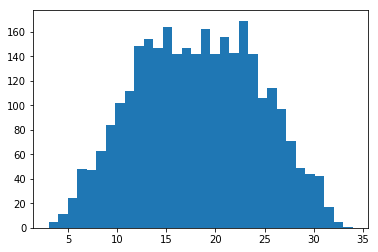

In [108]:
# a) Implementar una función que simule la suma del lanzamiento de 3 dados usando un generador congruencial mixto y un método de generación de variables aleatorias discretas. En donde, el primer dado tiene cuatro caras (d4), el segundo dado tiene diez caras (d10), y el tercero dado tiene 20 caras (d20).

%matplotlib inline
import matplotlib.pyplot as plt
import statistics

n1=4
n2=10
n3=20

N=3000

X = np.arange(3,n1+n2+n3+1)
PX = np.zeros(np.size(X))
print(np.size(X))
for i in range (1, n1+1):
    for j in range (1, n2+1):
        for k in range (1, n3+1):
            for ii in range (0,np.size(X)):
                if (X[ii]==(i+j+k)):                 
                    PX[ii]=PX[ii]+1
                    #print("ii: ",ii)
                    #print("X[ii]: ", X[ii])
                    #print("nop: ",i+j+k)
                    break
                    
                
print(X)
print(PX)

PX = PX/np.sum(PX)

print(PX)
print(sum(PX))

valoresperado = 0.0
for ii in range (0,np.size(X)):
    valoresperado = valoresperado + X[ii]*PX[ii]
print(valoresperado)


########################
            
X=np.array(X)
PX=np.array(PX)
P=PX.cumsum()
P[len(P)-1]=1
print(P)

[iii,xxx,U] = genranN(22695477,1,2**32,1234,N)
V=genvardiscret(U,X,P)
print("\nb) Generar y mostrar la suma de los tres dados para 1000 lanzamientos.\n")
#print(V)
print(np.unique(V))
count, bins, ignored = plt.hist(V,np.size(X))

print("\nc) ¿Cuál es el valor esperado teórico?: ",valoresperado)   
print("d) ¿Cuál es el promedio de los anteriores 1000 lanzamientos?", np.mean(V))
#print("e) ¿Cuál es la moda de los anteriores 1000 lanzamientos?", statistics.mode(V))

**5) Calcular el área de una elipse con el método de Monte Carlo.**
**Tomando como base el taller 4 (T4), haga lo siguiente**

    a) Implemente el método de Monte Carlo para calcular y mostrar el área estimada de una elipse con un semieje mayor a = 5 y semieje mejor b = 3 centrado en el origen x,y = (0,0) generando 1000 coordenadas aleatorias (X,Y) en el rango de X=[-a,a] y Y=[-b,b].
    b) Calcule el área real de la elipse.
    c) Calcule la diferencia entre el área real y el área estimada con el método de Monte Carlo
    d) Grafique los puntos aleatorios generados que caen dentro del círculo en rojo y los que caen fuera del círculo en azul 

_Rta.:_

La ecuación de la elipse es:

$\frac{(x-x_0)^2}{a^2} + \frac{(y-y_0)^2}{b^2} = 1$

La formula para calcular el área de la elipse es: $Area = \pi \cdot  a \cdot  b$

In [36]:
a=5
b=3
N = 1000

In [37]:
nElipse = 0
nNElipse = 0
X=[]
Y=[]
Xr=[]
Yr=[]
Xb=[]
Yb=[]
for i in range(1, N+1):
    Ux = np.random.rand()
    Uy = np.random.rand()
    X.append(2*a*Ux-a)
    Y.append(2*b*Uy-b)
    I = (X[i-1]**2)/(a**2) + (Y[i-1]**2)/(b**2)
    if I <= 1:
        nElipse = nElipse + 1
        Xr.append(X[i-1])
        Yr.append(Y[i-1])
    else:
        nNElipse = nNElipse +1
        Xb.append(X[i-1])
        Yb.append(Y[i-1])

AreaElipseMC = (float(nElipse)/ float(N))*((4*b*a))
print("a) Area estimada elipse con MC: ", AreaElipseMC)

a) Area estimada elipse con MC:  47.28


In [38]:


AreaElipseReal = np.pi*a*b

print("b) Calcule el área real de la elipse.",AreaElipseReal)

b) Calcule el área real de la elipse. 47.12388980384689


/Users/aacruzr/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:2649: UserWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))



c) Calcule la diferencia entre el área real y el área estimada con el método de Monte Carlo

Area Real = 47.12388980384689 Area Estimada= 47.28 Error = 0.156110196153

d) Grafique los puntos aleatorios generados que caen dentro del círculo en rojo y los que caen fuera del círculo en azul 


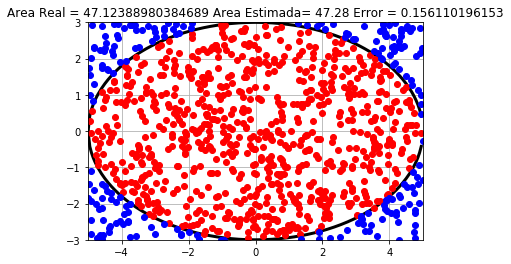

In [44]:


x = np.arange(-float(a),float(a),float(a)/100.0)
#x.append(1)
y1=[]
y2=[]
for i in x:
    n = np.sqrt((1-((i**2)/a**2))*b**2)
    y1.append(n)
    y2.append(-n)
    
plt.plot(x,y1,color="black",lw=3)
plt.plot(x,y2,color="black",lw=3)
plt.ylim(-(b), b)
plt.xlim(-(a), a)
plt.grid(True) 

plt.plot(Xr, Yr, color="red",linewidth=0, marker='o', lw=1 )
plt.plot(Xb, Yb, color="blue",linewidth=0, marker='o', lw=1 )
    
print("\nc) Calcule la diferencia entre el área real y el área estimada con el método de Monte Carlo\n")
print(titulo)
print("\nd) Grafique los puntos aleatorios generados que caen dentro del círculo en rojo y los que caen fuera del círculo en azul ")
titulo = "Area Real = "+str(AreaElipseReal)+\
         " Area Estimada= "+str(AreaElipseMC)+\
         " Error = "+str(np.abs(AreaElipseReal-AreaElipseMC))
plt.title(titulo)
plt.show()
   